# **Classification of iris varieties within the same species**

## Introduction

The aim of this Notebook is to use AI TRAINING product to train a simple model, on the Iris dataset, with the PyTorch library. It is an exemple of neural network for data classification

## Code

The neural network will be set up in different step. First, librairies have to be imported. Next, the neural network model will be defined et the dataset split. Then, the model will be trained. Finally, the loss rate will be displayed.



### Step 1 - librairies importation (and installation if required)

In [ ]:
pip install pandas sklearn matplotlib

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

### Step 2 - Define the neural network model 

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer : 4 input features for 4 parameters in X
        self.layer1 = nn.Linear(in_features=4, out_features=16)
        # fully connected layer
        self.layer2 = nn.Linear(in_features=16, out_features=12)
        # output layer : 3 output features for 3 species
        self.output = nn.Linear(in_features=12, out_features=3)
     
    def forward(self, x):
        # activation fonction : reLU
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output(x)
        return x

### Step 3 - Load and split Iris dataset

In [4]:
# data opening
dataset = load_iris()

# input of the neural network
X = dataset.data

# output of the neural network
y = dataset.targets
Y = y.astype("float64")

# train and test split : 20 % for the test and 80 % for the learning
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# convert split data from numpy array to Pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Step 4 - Train model

In [5]:
# display the model architecture
model = Model()
print("Model display: ",model)

# measure loss
criterion = nn.CrossEntropyLoss()
# optimizer Adam with a learning rate of 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# the model will be train during 100 epochs
epochs = 100

epoch_list = []
loss_list = []
perf= []
print("The loss is printed for each epoch: ")
for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    loss_list.append(loss)
    loss.backward()
    epoch_list.append(i)
    optimizer.step()
    
    # the loss is printed for each epoch
    print(f'Epoch: {i} Loss: {loss}')

Model display:  Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)
The loss is printed for each epoch: 
Epoch: 0 Loss: 1.1680996417999268
Epoch: 1 Loss: 1.097244381904602
Epoch: 2 Loss: 1.0423426628112793
Epoch: 3 Loss: 0.9945032000541687
Epoch: 4 Loss: 0.9617353677749634
Epoch: 5 Loss: 0.9350563287734985
Epoch: 6 Loss: 0.9055553674697876
Epoch: 7 Loss: 0.87175452709198
Epoch: 8 Loss: 0.8358991742134094
Epoch: 9 Loss: 0.7982655167579651
Epoch: 10 Loss: 0.7571284770965576
Epoch: 11 Loss: 0.7152224183082581
Epoch: 12 Loss: 0.6789106726646423
Epoch: 13 Loss: 0.6466698050498962
Epoch: 14 Loss: 0.6153203248977661
Epoch: 15 Loss: 0.5837200284004211
Epoch: 16 Loss: 0.5532621741294861
Epoch: 17 Loss: 0.5253481268882751
Epoch: 18 Loss: 0.5000964999198914
Epoch: 19 Loss: 0.476775586605072
Epoch: 20 Loss: 0.45460379123687744
Epoch: 21 Loss: 0.43366950750

### Step 5 - Prediction and loss display

Last value of loss:  0.064
Prediction accuracy:  1.0


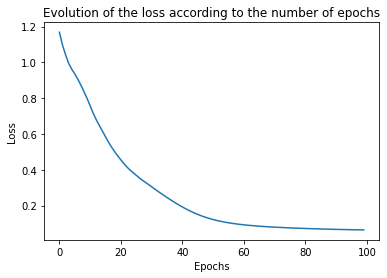

In [6]:
# print the last loss 
last_loss = loss_list[99].item()
print('Last value of loss: ',round(last_loss,3))

# make prediction
predict_out = model(X_test)
_, predict_y = torch.max(predict_out, 1)

# print he accuracy
print('Prediction accuracy: ', accuracy_score(y_test.data, predict_y.data))

# display the graph of loss
plt.plot(epoch_list,loss_list)
plt.title('Evolution of the loss according to the number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Conclusion

- The loss of this neural network is really low (arround 0.05 %).
- The accuracy of the prediction is 100 %. It means that the prediction il always good with this model.